In [1]:
## IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import math
import json



In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
#portfolio

In [4]:
# quick check on missing value in dataset
portfolio.isnull().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

In [5]:
# the number of unique offer in dataset
portfolio.id.nunique()

10

In [6]:
# count the number of offer by offer type
portfolio.groupby('offer_type').id.count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

In [7]:
#profile

In [8]:
# the number of unique offer in dataset
profile.id.nunique()

17000

In [9]:
# quick check for null values in dataset
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [10]:
# number of missing values in age column
profile[profile.age==118].count()

age                 2175
became_member_on    2175
gender                 0
id                  2175
income                 0
dtype: int64

In [11]:
# check if the rows which have missing age also have missing gender and income
profile[profile.age==118].head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN


In [12]:
#transcript.head()

In [13]:
transcript.person.nunique()

17000

In [14]:
# quick check on missing value
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [15]:
transcript.groupby('event').person.count()

event
offer completed     33579
offer received      76277
offer viewed        57725
transaction        138953
Name: person, dtype: int64

In [16]:
# portfolio: rename id col name to offer_id.
portfolio.rename(columns={'id': 'offer_id'}, inplace=True)

In [17]:
# portfolio: one-hot encode channels

for index, row in portfolio.iterrows():
    for channel in ['web', 'email', 'social', 'mobile']:
        if channel in portfolio.loc[index, 'channels']:
            portfolio.loc[index, channel] = 1
        else:
            portfolio.loc[index, channel] = 0
#portfolio.drop(columns='channels', inplace=True)
#DONOT DROP THE CHANNELS NOW,WE NEED THIS FOR DATA VISUALISATION

#dropping email

portfolio.drop(columns='email', inplace=True)

In [18]:
portfolio

,channels,difficulty,duration,offer_id,offer_type,reward,web,email,social,mobile
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0.0,1.0,1.0,1.0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1.0,1.0,1.0,1.0
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1.0,1.0,0.0,1.0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1.0,1.0,0.0,1.0
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1.0,1.0,0.0,0.0
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1.0,1.0,1.0,1.0
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1.0,1.0,1.0,1.0
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0.0,1.0,1.0,1.0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1.0,1.0,1.0,1.0
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1.0,1.0,0.0,1.0


In [19]:
# profile: rename id col name customer_id.
profile.rename(columns={'id': 'customer_id'}, inplace=True)

In [20]:
# profile: create readable date format for became_member_on column.
profile.became_member_on = profile['became_member_on'].astype(str).astype('datetime64[ns]', format = "%Y%m%d")

In [21]:
# profile: drop rows with no gender, income, age data
profile = profile.drop(profile[profile['gender'].isnull()].index)

In [22]:
#add a column which indicates the number of membership days

from datetime import date

profile['date']=date.today()
profile['date']=profile['date'].astype(str).astype('datetime64[ns]', format = "%Y%m%d")
def membership_days():
    data1 = profile [['became_member_on']]
    data2 = profile [['date']]
    print (np.subtract(data2,data1))
    #return pd.Series({'membership_days',np.subtract(data2,data1)})
    return (np.subtract(data2,data1))

In [23]:
profile['became_member_on']=profile['became_member_on'].astype(str).astype('datetime64[ns]', format = "%Y%m%d")
profile['membership_days']=membership_days()
#profile['membership_days']=profile['membership_days'].astype(str).astype('datetime64[ns]', format = "%Y%m%d")

           date
1     1230 days
3     1297 days
5      945 days
8     1021 days
12    1111 days
13    1172 days
14    2478 days
15    1750 days
16    2205 days
18    1061 days
19     940 days
20    1667 days
21    1174 days
22    1259 days
24    2664 days
25     943 days
27    1157 days
28    1172 days
29    2136 days
30    2287 days
31    1167 days
32    1158 days
33    1105 days
34    1601 days
35    1565 days
37    2391 days
38    1202 days
40    1841 days
41    1599 days
42     873 days
...         ...
16963 1414 days
16964  963 days
16965  962 days
16966 2131 days
16967 1980 days
16968 1220 days
16970 1846 days
16971  919 days
16972 1407 days
16973 1872 days
16974 1779 days
16975 1061 days
16976 1527 days
16978 1375 days
16979 2622 days
16981 1611 days
16983 2063 days
16984 1594 days
16985  891 days
16986 1214 days
16987 1601 days
16988 1057 days
16990 1722 days
16992 1166 days
16993  936 days
16995  906 days
16996  867 days
16997 1400 days
16998 1725 days
16999 1223 days

[14825 

In [24]:
#profile

In [25]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 7 columns):
age                 14825 non-null int64
became_member_on    14825 non-null datetime64[ns]
gender              14825 non-null object
customer_id         14825 non-null object
income              14825 non-null float64
date                14825 non-null datetime64[ns]
membership_days     14825 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2), timedelta64[ns](1)
memory usage: 926.6+ KB


In [26]:
# transcript: rename person col name to customer_id.
transcript.rename(columns={'person': 'customer_id'}, inplace=True)

In [27]:
# transcript: create separate columns for amount and offer_id from value col.

def create_offer_id_col(val):
    if list(val.keys())[0] in ['offer id', 'offer_id']:
        return list(val.values())[0]
    
def create_amount_col(val):
    if list(val.keys())[0] in ['amount']:
        return list(val.values())[0]
    
transcript['offer_id'] = transcript.value.apply(create_offer_id_col)
transcript['amount'] = transcript.value.apply(create_amount_col)

# change amount column type to float
transcript.amount.astype('float')



0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
          ...  
306504     4.89
306505     4.48
306506      NaN
306507      NaN
306508     1.19
306509      NaN
306510    14.31
306511     2.37
306512     6.92
306513    12.73
306514     8.20
306515     2.60
306516     9.20
306517    11.70
306518    40.67
306519    31.13
306520     1.64
306521    17.35
306522     4.42
306523    18.35
306524    25.14
306525    43.58
306526    22.64
306527      NaN
306528     2.20
306529     1.59
306530     9.53
306531     3.61
306532     3.53
306533     4.05
Name: amount, Length: 30

In [28]:
# transcript: drop transaction rows whose customer_id is not in profile:customer_id
transcript = transcript[transcript.customer_id.isin(profile.customer_id)]

In [29]:
transcript_preprocessed = transcript.copy()

In [30]:
# transcript:  seggregate offer and transaction data 

# extract offer-related from transcript data
#transcript_preprocessed = transcript.copy()

# one-hot encode offer event
transcript_preprocessed['offer_received'] = transcript_preprocessed.event.apply(lambda x: 1 if x == 'offer received' else 0)
transcript_preprocessed['offer_completed'] = transcript_preprocessed.event.apply(lambda x: 1 if x == 'offer completed' else 0)
transcript_preprocessed['offer_viewed'] = transcript_preprocessed.event.apply(lambda x: 1 if x == 'offer viewed' else 0)
transcript_preprocessed['transaction'] = transcript_preprocessed.event.apply(lambda x: 1 if x == 'transaction' else 0)

In [31]:
#Merge transcript_preprocessed with portfolio Analyse the data
transcript_preprocessed = transcript_preprocessed.merge(portfolio, how = 'left',on='offer_id')

In [32]:
transcript_preprocessed.head()

,event,customer_id,time,value,offer_id,amount,offer_received,offer_completed,offer_viewed,transaction,channels,difficulty,duration,offer_type,reward,web,email,social,mobile
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,1,0,0,0,"[web, email, mobile]",5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
1,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,1,0,0,0,"[web, email, mobile]",10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0
2,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,NaN,1,0,0,0,"[web, email, mobile, social]",5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0
3,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed,NaN,1,0,0,0,"[web, email, mobile]",0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0
4,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,1,0,0,0,"[web, email]",20.0,10.0,discount,5.0,1.0,1.0,0.0,0.0


In [33]:
#Merge transcript_preprocessed with profile Analyse the data
transcript_preprocessed = transcript_preprocessed.merge(profile, how = 'left',on='customer_id')

In [34]:
#drop became_member_on,date
transcript_preprocessed.drop(columns=['became_member_on','date'], inplace=True)

In [35]:
customer_tracking=transcript_preprocessed[["customer_id","gender","age","income","membership_days","offer_id","offer_type","offer_received","offer_viewed","offer_completed","transaction","amount","time","duration","difficulty","channels","reward","web","social","mobile","email"]]

In [36]:
def age_category(customer_tracking):
   
    #remove outliers
    customer_tracking = customer_tracking[customer_tracking['age'] <= 80]
    customer_tracking['age'] = customer_tracking['age'].astype(float)
    
    #add Age_group column
    customer_tracking.loc[(customer_tracking.age < 20) , 'Age_group'] = 'Under 20'
    customer_tracking.loc[(customer_tracking.age >= 20) & (customer_tracking.age <= 45) , 'Age_group'] = '20-45'
    customer_tracking.loc[(customer_tracking.age >= 46) & (customer_tracking.age <= 60) , 'Age_group'] = '46-60'
    customer_tracking.loc[(customer_tracking.age >= 61) , 'Age_group'] = 'Above 60'
    customer_tracking.drop('age',axis=1,inplace=True)
    return customer_tracking

In [37]:
customer_tracking = age_category(customer_tracking)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [38]:
customer_tracking.head()

,customer_id,gender,income,membership_days,offer_id,offer_type,offer_received,offer_viewed,offer_completed,transaction,...,time,duration,difficulty,channels,reward,web,social,mobile,email,Age_group
0,78afa995795e4d85b5d9ceeca43f5fef,F,100000.0,1297 days,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,0,0,0,...,0,7.0,5.0,"[web, email, mobile]",5.0,1.0,0.0,1.0,1.0,Above 60
1,e2127556f4f64592b11af22de27a7932,M,70000.0,945 days,2906b810c7d4411798c6938adc9daaa5,discount,1,0,0,0,...,0,7.0,10.0,"[web, email, mobile]",2.0,1.0,0.0,1.0,1.0,Above 60
2,389bc3fa690240e798340f5a15918d5c,M,53000.0,1021 days,f19421c1d4aa40978ebb69ca19b0e20d,bogo,1,0,0,0,...,0,5.0,5.0,"[web, email, mobile, social]",5.0,1.0,1.0,1.0,1.0,Above 60
3,2eeac8d8feae4a8cad5a6af0499a211d,M,51000.0,1111 days,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0,4.0,0.0,"[web, email, mobile]",0.0,1.0,0.0,1.0,1.0,46-60
4,aa4862eba776480b8bb9c68455b8c2e1,F,57000.0,1172 days,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,0,...,0,10.0,20.0,"[web, email]",5.0,1.0,0.0,0.0,1.0,Above 60


In [39]:
customer_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254955 entries, 0 to 272761
Data columns (total 21 columns):
customer_id        254955 non-null object
gender             254955 non-null object
income             254955 non-null float64
membership_days    254955 non-null timedelta64[ns]
offer_id           138727 non-null object
offer_type         138727 non-null object
offer_received     254955 non-null int64
offer_viewed       254955 non-null int64
offer_completed    254955 non-null int64
transaction        254955 non-null int64
amount             116228 non-null float64
time               254955 non-null int64
duration           138727 non-null float64
difficulty         138727 non-null float64
channels           138727 non-null object
reward             138727 non-null float64
web                138727 non-null float64
social             138727 non-null float64
mobile             138727 non-null float64
email              138727 non-null float64
Age_group          254955 non-null o

ENCODING THE AGE GROUP

In [40]:
customer_tracking = customer_tracking.copy()

In [41]:
customer_tracking = customer_tracking[customer_tracking.Age_group!=118].copy()


In [42]:

# one-hot encode Age group
customer_tracking['Under 20'] = customer_tracking.Age_group.apply(lambda x: 1 if x == 'Under 20' else 0)
customer_tracking['20-45'] = customer_tracking.Age_group.apply(lambda x: 1 if x == '20-45' else 0)
customer_tracking['46-60'] = customer_tracking.Age_group.apply(lambda x: 1 if x == '46-60' else 0)
customer_tracking['Above 60'] = customer_tracking.Age_group.apply(lambda x: 1 if x == 'Above 60' else 0)

In [43]:
#drop the column Age_group
#customer_tracking=customer_tracking.drop('Age_group',axis=1)
#We will drop this after data visualisation

In [44]:
customer_tracking.head()

,customer_id,gender,income,membership_days,offer_id,offer_type,offer_received,offer_viewed,offer_completed,transaction,...,reward,web,social,mobile,email,Age_group,Under 20,20-45,46-60,Above 60
0,78afa995795e4d85b5d9ceeca43f5fef,F,100000.0,1297 days,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,0,0,0,...,5.0,1.0,0.0,1.0,1.0,Above 60,0,0,0,1
1,e2127556f4f64592b11af22de27a7932,M,70000.0,945 days,2906b810c7d4411798c6938adc9daaa5,discount,1,0,0,0,...,2.0,1.0,0.0,1.0,1.0,Above 60,0,0,0,1
2,389bc3fa690240e798340f5a15918d5c,M,53000.0,1021 days,f19421c1d4aa40978ebb69ca19b0e20d,bogo,1,0,0,0,...,5.0,1.0,1.0,1.0,1.0,Above 60,0,0,0,1
3,2eeac8d8feae4a8cad5a6af0499a211d,M,51000.0,1111 days,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0.0,1.0,0.0,1.0,1.0,46-60,0,0,1,0
4,aa4862eba776480b8bb9c68455b8c2e1,F,57000.0,1172 days,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,0,...,5.0,1.0,0.0,0.0,1.0,Above 60,0,0,0,1


ENCODING GENDER

In [45]:
customer_tracking = customer_tracking.copy()

In [46]:
customer_tracking = customer_tracking[customer_tracking.gender!='O'].copy()

In [47]:
# one-hot encode Age group
customer_tracking['Male'] = customer_tracking.gender.apply(lambda x: 1 if x == 'M' else 0)
customer_tracking['Female'] = customer_tracking.gender.apply(lambda x: 1 if x == 'F' else 0)

In [48]:
#drop the column gender
#customer_tracking=customer_tracking.drop('gender',axis=1)
#drop after data visualisation

In [49]:
customer_tracking.head()

,customer_id,gender,income,membership_days,offer_id,offer_type,offer_received,offer_viewed,offer_completed,transaction,...,social,mobile,email,Age_group,Under 20,20-45,46-60,Above 60,Male,Female
0,78afa995795e4d85b5d9ceeca43f5fef,F,100000.0,1297 days,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,0,0,0,...,0.0,1.0,1.0,Above 60,0,0,0,1,0,1
1,e2127556f4f64592b11af22de27a7932,M,70000.0,945 days,2906b810c7d4411798c6938adc9daaa5,discount,1,0,0,0,...,0.0,1.0,1.0,Above 60,0,0,0,1,1,0
2,389bc3fa690240e798340f5a15918d5c,M,53000.0,1021 days,f19421c1d4aa40978ebb69ca19b0e20d,bogo,1,0,0,0,...,1.0,1.0,1.0,Above 60,0,0,0,1,1,0
3,2eeac8d8feae4a8cad5a6af0499a211d,M,51000.0,1111 days,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0.0,1.0,1.0,46-60,0,0,1,0,1,0
4,aa4862eba776480b8bb9c68455b8c2e1,F,57000.0,1172 days,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,0,...,0.0,0.0,1.0,Above 60,0,0,0,1,0,1


TO FIND THE INCOME DISTRIBUTION 

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


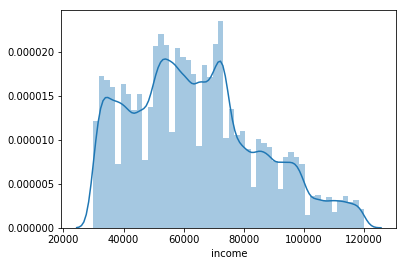

In [51]:
sns.distplot(customer_tracking['income'], bins=50, hist_kws={'alpha': 0.4});

In [52]:
customer_tracking['income'].mean()

63931.339801496142

In [53]:
def income_category(customer_tracking):
   
    #remove outliers
    customer_tracking = customer_tracking[customer_tracking['income'] >= 20000]
    customer_tracking['income'] = customer_tracking['income'].astype(float)
    
    #add Age_group column
    customer_tracking.loc[(customer_tracking.income < 30000) , 'income_group'] = 'Under 30000'
    customer_tracking.loc[(customer_tracking.income >= 30000) & (customer_tracking.income  <= 60000) , 'income_group'] = '30000-60000'
    customer_tracking.loc[(customer_tracking.income >= 60000) & (customer_tracking.income  <= 90000) , 'income_group'] = '60000-90000'
    customer_tracking.loc[(customer_tracking.income >= 90000) , 'income_group'] = 'Above 90000'
    #customer_tracking.drop('income',axis=1,inplace=True)
    return customer_tracking

In [54]:
customer_tracking = income_category(customer_tracking)

In [55]:
customer_tracking.head()

,customer_id,gender,income,membership_days,offer_id,offer_type,offer_received,offer_viewed,offer_completed,transaction,...,mobile,email,Age_group,Under 20,20-45,46-60,Above 60,Male,Female,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,F,100000.0,1297 days,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,0,0,0,...,1.0,1.0,Above 60,0,0,0,1,0,1,Above 90000
1,e2127556f4f64592b11af22de27a7932,M,70000.0,945 days,2906b810c7d4411798c6938adc9daaa5,discount,1,0,0,0,...,1.0,1.0,Above 60,0,0,0,1,1,0,60000-90000
2,389bc3fa690240e798340f5a15918d5c,M,53000.0,1021 days,f19421c1d4aa40978ebb69ca19b0e20d,bogo,1,0,0,0,...,1.0,1.0,Above 60,0,0,0,1,1,0,30000-60000
3,2eeac8d8feae4a8cad5a6af0499a211d,M,51000.0,1111 days,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,1.0,1.0,46-60,0,0,1,0,1,0,30000-60000
4,aa4862eba776480b8bb9c68455b8c2e1,F,57000.0,1172 days,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,0,...,0.0,1.0,Above 60,0,0,0,1,0,1,30000-60000


ENCODING THE INCOME CATEGORY

In [56]:
# one-hot encode INCOME CATEGORY
customer_tracking['Under 30000'] = customer_tracking.income_group.apply(lambda x: 1 if x == 'Under 30000' else 0)
customer_tracking['30000-60000'] = customer_tracking.income_group.apply(lambda x: 1 if x == '30000-60000' else 0)
customer_tracking['60000-90000'] = customer_tracking.income_group.apply(lambda x: 1 if x == '60000-90000' else 0)
customer_tracking['Above 90000'] = customer_tracking.income_group.apply(lambda x: 1 if x == 'Above 90000' else 0)

In [57]:
#customer_tracking.drop('income_group',axis=1,inplace=True)

In [63]:
#split transcript into 3 different offer types
bogo_file = customer_tracking[customer_tracking['offer_type']=='bogo'].copy()
discount_file= customer_tracking[customer_tracking['offer_type']=='discount'].copy()
informational_file = customer_tracking[customer_tracking['offer_type']=='informational'].copy()
transcation_file = customer_tracking[customer_tracking['transaction']==1].copy()    

In [64]:
import csv
bogo_file.to_csv('./modified data/bogo_file.csv',index=False)
discount_file.to_csv('./modified data/discount_file.csv',index=False)
informational_file.to_csv('./modified data/informational_file.csv',index=False)
transcation_file.to_csv('./modified data/transaction_file.csv',index=False)

In [4]:
#read the files
bogo_file = pd.read_csv (r'./modified data/bogo_file.csv')
discount_file = pd.read_csv (r'./modified data/discount_file.csv')
informational_file = pd.read_csv (r'./modified data/informational_file.csv')
transcation_file = pd.read_csv (r'./modified data/transaction_file.csv')

In [59]:
#portfolio

In [60]:
#to identify which type of bogo offer
def bogo_type(offer_id,offer_type):
    for index, row in bogo_file.iterrows():
        if row['offer_id'] == 'ae264e3637204a6fb9bb56bc8210ddfd':
            bogo_file.loc[index,'exact_offer'] = "bogo_1"
                
        elif row['offer_id'] == '4d5c57ea9a6940dd891ad53e9dbe8da0' :
            bogo_file.loc[index,'exact_offer'] = "bogo_2"
        
        elif row['offer_id'] == '9b98b8c7a33c4b65b9aebfe6a799e6d9' :
            bogo_file.loc[index,'exact_offer'] = "bogo_3"
                
        else :
            bogo_file.loc[index,'exact_offer']="bogo_4"

In [61]:
bogo_type(bogo_file['offer_id'], bogo_file['offer_type'])

In [62]:
#split bogo file into 4 different bogo offer types
bogo_type1 = bogo_file[bogo_file['exact_offer']=='bogo_1'].copy()
bogo_type2 = bogo_file[bogo_file['exact_offer']=='bogo_2'].copy()
bogo_type3 = bogo_file[bogo_file['exact_offer']=='bogo_3'].copy()
bogo_type4 = bogo_file[bogo_file['exact_offer']=='bogo_4'].copy()

In [63]:
import csv
bogo_type1.to_csv('./modified data/bogo_type1.csv', index=False)
bogo_type2.to_csv('./modified data/bogo_type2.csv', index=False)
bogo_type3.to_csv('./modified data/bogo_type3.csv', index=False)
bogo_type4.to_csv('./modified data/bogo_type4.csv', index=False)

In [66]:
#read files
bogo_type1 = pd.read_csv (r'./modified data/bogo_type1.csv')
bogo_type2 = pd.read_csv (r'./modified data/bogo_type2.csv')
bogo_type3 = pd.read_csv (r'./modified data/bogo_type3.csv')
bogo_type4 = pd.read_csv (r'./modified data/bogo_type4.csv')

In [ ]:
#bogo_type1.info()

In [ ]:
#bogo_type2.info()

In [ ]:
#bogo_type3.info()

In [ ]:
#bogo_type4.info()

In [ ]:
#bogo_file.info()

In [64]:
def customer_bogo1 (exact_offer,offer_received,offer_viewed,offer_completed):
    for index, row in bogo_type1.iterrows():
        if row['exact_offer'] == 'bogo_1':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_bogo1")
                bogo_type1.loc[index,'Category'] = "effective_bogo1"
                #bogo_type1.loc[index,'Category'] = 2
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_bogo1")
                bogo_type1.loc[index,'Category'] = "interested_bogo1"
                #bogo_type1.loc[index,'Category'] = 1
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_bogo1")
                bogo_type1.loc[index,'Category'] = "interested_bogo1"
                #bogo_type1.loc[index,'Category'] = 1
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_bogo1")
                bogo_type1.loc[index,'Category'] = "interested_bogo1"
                #bogo_type1.loc[index,'Category'] = 1
                
        
            else :
                #print ("ineffective_bogo1")
                bogo_type1.loc[index,'Category']="ineffective_bogo1"
                #bogo_type1.loc[index,'Category'] = 0

In [65]:
customer_bogo1(bogo_type1['exact_offer'], bogo_type1['offer_received'], bogo_type1['offer_viewed'], bogo_type1['offer_completed'])

In [66]:
#bogo_type1.head()

In [67]:
def customer_bogo2 (exact_offer,offer_received,offer_viewed,offer_completed):
    for index, row in bogo_type2.iterrows():
        if row['exact_offer'] == 'bogo_2':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_bogo2")
                bogo_type2.loc[index,'Category'] = "effective_bogo2"
                #bogo_type2.loc[index,'Category'] = 2
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_bogo2")
                bogo_type2.loc[index,'Category'] = "interested_bogo2"
                #bogo_type2.loc[index,'Category'] = 1
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_bogo2")
                bogo_type2.loc[index,'Category'] = "interested_bogo2"
                #bogo_type2.loc[index,'Category'] = 1
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_bogo2")
                bogo_type2.loc[index,'Category'] = "interested_bogo2"
                #bogo_type2.loc[index,'Category'] = 1
        
            else :
                #print ("ineffective_bogo2")
                bogo_type2.loc[index,'Category']="ineffective_bogo2"
                #bogo_type2.loc[index,'Category'] = 0

In [68]:
customer_bogo2(bogo_type2['exact_offer'], bogo_type2['offer_received'], bogo_type2['offer_viewed'], bogo_type2['offer_completed'])

In [69]:
#bogo_type2

In [70]:
def customer_bogo3 (offer_type,offer_received,offer_viewed,offer_completed):
    for index, row in bogo_type3.iterrows():
        if row['exact_offer'] == 'bogo_3':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_bogo3")
                bogo_type3.loc[index,'Category'] = "effective_bogo3"
                #bogo_type3.loc[index,'Category'] = 1
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_bogo3")
                bogo_type3.loc[index,'Category'] = "interested_bogo3"
                #bogo_type3.loc[index,'Category'] = 2
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_bogo3")
                bogo_type3.loc[index,'Category'] = "interested_bogo3"
                #bogo_type3.loc[index,'Category'] = 2
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_bogo3")
                bogo_type3.loc[index,'Category'] = "interested_bogo3"
                #bogo_type3.loc[index,'Category'] = 2
                
        
            else :
                #print ("ineffective_bogo3")
                bogo_type3.loc[index,'Category']="ineffective_bogo3"
                #bogo_type3.loc[index,'Category'] = 0

In [71]:
customer_bogo3(bogo_type3['exact_offer'], bogo_type3['offer_received'], bogo_type3['offer_viewed'], bogo_type3['offer_completed'])

In [ ]:
#bogo_type3

In [72]:
def customer_bogo4 (offer_type,offer_received,offer_viewed,offer_completed):
    for index, row in bogo_type4.iterrows():
        if row['exact_offer'] == 'bogo_4':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_bogo4")
                bogo_type4.loc[index,'Category'] = "effective_bogo4"
                #bogo_type4.loc[index,'Category'] = 1
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_bogo4")
                bogo_type4.loc[index,'Category'] = "interested_bogo4"
                #bogo_type4.loc[index,'Category'] = 2
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_bogo4")
                bogo_type4.loc[index,'Category'] = "interested_bogo4"
                #bogo_type4.loc[index,'Category'] = 2
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_bogo4")
                bogo_type4.loc[index,'Category'] = "interested_bogo4"
                #bogo_type4.loc[index,'Category'] = 2
                
        
            else :
                #print ("ineffective_bogo4")
                bogo_type4.loc[index,'Category']="ineffective_bogo4"
                #bogo_type4.loc[index,'Category'] = 0

In [73]:
customer_bogo4(bogo_type4['exact_offer'], bogo_type4['offer_received'], bogo_type4['offer_viewed'], bogo_type4['offer_completed'])

In [ ]:
#bogo_type4

In [74]:
#join the bogo files
bogo_alltypes = bogo_type1.append([bogo_type2, bogo_type3,bogo_type4])

In [75]:
bogo_alltypes.to_csv('./modified data/bogo_alltypes.csv',index=False)



In [67]:
bogo_alltypes = pd.read_csv (r'./modified data/bogo_alltypes.csv')

In [76]:
#bogo_final

In [77]:
#bogo_final.info()

DATA VISUALISATION OF BOGO OFFERS

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv


In [2]:
bogo_alltypes = pd.read_csv (r'./modified data/bogo_alltypes.csv')


In [3]:
plot_gender = bogo_alltypes[bogo_alltypes['gender'] != 'O']

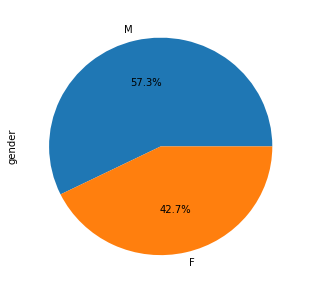

In [4]:
plot_gender.gender.value_counts().plot(kind='pie' , figsize=(5, 5), autopct='%1.1f%%')

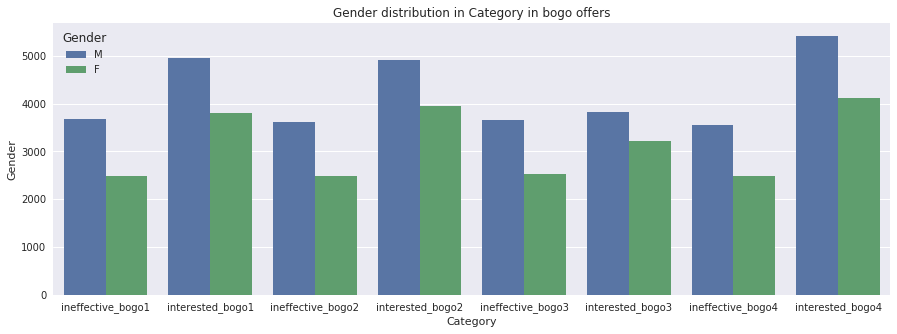

In [8]:
#Gender distribution in age groups in bogo offers
plt.figure(figsize=(15, 5))
sns.countplot(x= "Category", hue= "gender", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Gender distribution in Category in bogo offers')
plt.ylabel('Gender')
plt.xlabel('Category')
plt.legend(title='Gender')

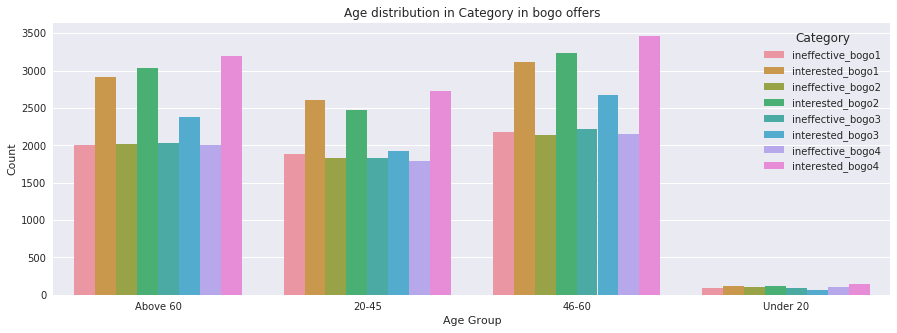

In [82]:
#Age distribution in Category in bogo offers
plt.figure(figsize=(15, 5))
sns.countplot(x= "Age_group", hue= "Category", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Age distribution in Category in bogo offers')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Category')

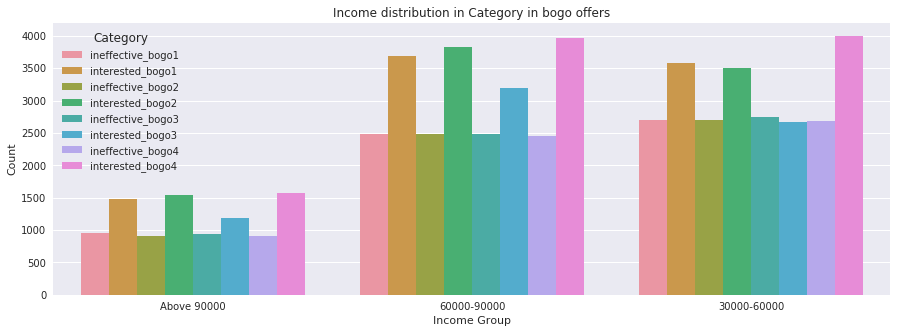

In [9]:
#Income distribution in Category in bogo offers
plt.figure(figsize=(15, 5))
sns.countplot(x= "income_group", hue= "Category", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Income distribution in Category in bogo offers')
plt.ylabel('Count')
plt.xlabel('Income Group')
plt.legend(title='Category')

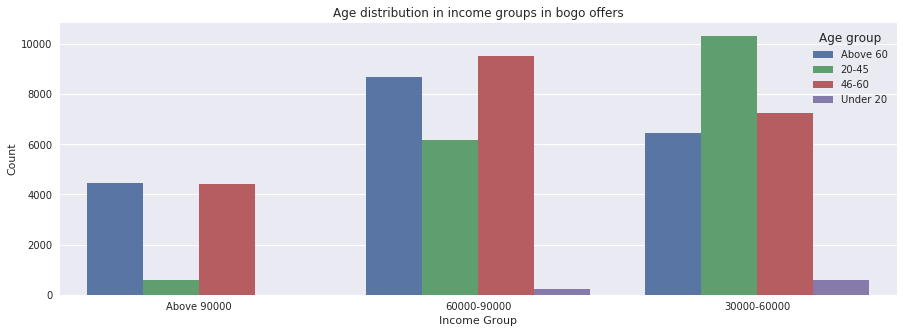

In [84]:
#'Age distribution in income groups in bogo offers'
plt.figure(figsize=(15, 5))
sns.countplot(x= "income_group", hue= "Age_group", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Age distribution in income groups in bogo offers')
plt.ylabel('Count')
plt.xlabel('Income Group')
plt.legend(title='Age group')

In [85]:
#Encode send offer = 1 and Dont send offer = 0
def send_bogo1(exact_offer,Category):
    for index, row in bogo_alltypes.iterrows():
        if row['exact_offer'] == 'bogo_1':
            if row['Category'] == 'effective_bogo1' :
                bogo_alltypes.loc[index,'send_bogo1'] = 1
                
            elif row['Category'] == 'interested_bogo1' :
                bogo_alltypes.loc[index,'send_bogo1'] = 1
                
            else :
                bogo_alltypes.loc[index,'send_bogo1'] = 0
                
        else :
            bogo_alltypes.loc[index,'send_bogo1'] = 0
            

In [86]:
send_bogo1(bogo_alltypes['exact_offer'], bogo_alltypes['Category'])

In [88]:
#bogo_alltypes

In [89]:
def send_bogo2(exact_offer,Category):
    for index, row in bogo_alltypes.iterrows():
        if row['exact_offer'] == 'bogo_2':
            if row['Category'] == 'effective_bogo2' :
                bogo_alltypes.loc[index,'send_bogo2'] = 1
                
                
            elif row['Category'] == 'interested_bogo2' :
                bogo_alltypes.loc[index,'send_bogo2'] = 1
                
            else :
                bogo_alltypes.loc[index,'send_bogo2'] = 0
                
        else :
            bogo_alltypes.loc[index,'send_bogo2'] = 0
            

In [90]:
send_bogo2(bogo_alltypes['exact_offer'], bogo_alltypes['Category'])

In [91]:
def send_bogo3(exact_offer,Category):
    for index, row in bogo_alltypes.iterrows():
        if row['exact_offer'] == 'bogo_3':
            if row['Category'] == 'effective_bogo3' :
                bogo_alltypes.loc[index,'send_bogo3'] = 1
                
                
            elif row['Category'] == 'interested_bogo3' :
                bogo_alltypes.loc[index,'send_bogo3'] = 1
                
            else :
                bogo_alltypes.loc[index,'send_bogo3'] = 0
                
        else :
            bogo_alltypes.loc[index,'send_bogo3'] = 0
            

In [92]:
send_bogo3(bogo_alltypes['exact_offer'], bogo_alltypes['Category'])

In [93]:
def send_bogo4(exact_offer,Category):
    for index, row in bogo_alltypes.iterrows():
        if row['exact_offer'] == 'bogo_4':
            if row['Category'] == 'effective_bogo4' :
                bogo_alltypes.loc[index,'send_bogo4'] = 1
               
                
            elif row['Category'] == 'interested_bogo4' :
                bogo_alltypes.loc[index,'send_bogo4'] = 1
                
            else :
                bogo_alltypes.loc[index,'send_bogo4'] = 0
                
        else :
            bogo_alltypes.loc[index,'send_bogo4'] = 0
            

In [94]:
send_bogo4(bogo_alltypes['exact_offer'], bogo_alltypes['Category'])

In [97]:
#bogo_alltypes

In [98]:
#bogo_alltypes.info()

In [99]:
bogo_send=bogo_alltypes.copy()

In [101]:
bogo_send.to_csv('./modified data/bogo_send.csv',index= False)

In [110]:
def offer_category(exact_offer):
    for index, row in bogo_send.iterrows():
        if row['exact_offer'] == 'bogo_1':
            bogo_send.loc[index,'offer_category'] = 1

        elif row['exact_offer'] == 'bogo_2' :
            bogo_send.loc[index,'offer_category'] = 2
        
        elif row['exact_offer'] == 'bogo_3' :
            bogo_send.loc[index,'offer_category'] = 3
                
        else :
            bogo_send.loc[index,'offer_category'] = 4
           

In [111]:
offer_category(bogo_send['exact_offer'])

In [112]:
bogo_send

,customer_id,gender,income,membership_days,offer_id,offer_type,offer_received,offer_viewed,offer_completed,transaction,...,30000-60000,60000-90000,Above 90000,exact_offer,Category,send_bogo1,send_bogo2,send_bogo3,send_bogo4,offer_category
6,4b0da7e80e5945209a1fdddfe813dbe0,M,100000.0,1173 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,0,0,1,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0
12,1e9420836d554513ab90eba98552d0a9,M,70000.0,1157 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,0,1,0,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0
18,02c083884c7d45b39cc68e1314fec56c,F,30000.0,1598 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,1,0,0,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0
25,676506bad68e4161b9bbaffeb039626b,M,92000.0,1290 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,0,0,1,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0
28,fe8264108d5b4f198453bbb1fa7ca6c9,F,93000.0,1508 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,0,0,1,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0
35,39dbcf43e24d41f4bbf0f134157e0e1e,M,64000.0,2278 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,0,1,0,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0
41,3f244f4dea654688ace14acb4f0257bb,M,71000.0,876 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,0,1,0,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0
60,92e07c49ee7448fca6e48df0c96e3eec,F,58000.0,1013 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,1,0,0,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0
61,f8aedd0cbea0419c806842b4265b82e5,F,72000.0,1567 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,0,1,0,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0
64,8a4bc602e4424ab6b16f0b907f2f22af,M,31000.0,1081 days,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,0,...,1,0,0,bogo_1,ineffective_bogo1,0.0,0.0,0.0,0.0,1.0


In [113]:
bogo_category=bogo_send.copy()

In [115]:
bogo_category.to_csv('./modified data/bogo_category.csv',index=False)

In [68]:
bogo_category = pd.read_csv (r'./modified data/bogo_category.csv')

In [117]:
#bogo_category.info()

In [69]:
bogo_category=bogo_category.drop('offer_received',axis=1)
bogo_categorybogo_category=bogo_category.drop('offer_completed',axis=1)
bogo_category=bogo_category.drop('offer_viewed',axis=1)

In [70]:
bogo_category=bogo_category.drop('transaction',axis=1)
bogo_category=bogo_category.drop('amount',axis=1)

In [71]:
bogo_category=bogo_category.drop('gender',axis=1)
bogo_category=bogo_category.drop('Age_group',axis=1)
bogo_category=bogo_category.drop('income',axis=1)
bogo_category=bogo_category.drop('income_group',axis=1)

In [72]:
bogo_category=bogo_category.drop('exact_offer',axis=1)
bogo_category=bogo_category.drop('duration',axis=1)
bogo_category=bogo_category.drop('difficulty',axis=1)
bogo_category=bogo_category.drop('reward',axis=1)
bogo_category=bogo_category.drop('channels',axis=1)

In [73]:
bogo_category=bogo_category.drop('offer_id',axis=1)
bogo_category=bogo_category.drop('offer_type',axis=1)

In [74]:
bogo_category=bogo_category.drop('time',axis=1)
bogo_category=bogo_category.drop('Category',axis=1)

In [86]:
bogo_category=bogo_category.drop('membership_days',axis=1)
#assume membership days donot influence the category
bogo_category=bogo_category.drop('customer_id',axis=1)

In [87]:
bogo_category

,offer_completed,web,social,mobile,email,Under 20,20-45,46-60,Above 60,Male,Female,Under 30000,30000-60000,60000-90000,Above 90000,send_bogo1,send_bogo2,send_bogo3,send_bogo4,offer_category
0,0,0.0,1.0,1.0,1.0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
1,0,0.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,1.0,1.0,1.0,0,1,0,0,0,1,0,1,0,0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
4,0,0.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0,0,1,0.0,0.0,0.0,0.0,1.0
5,0,0.0,1.0,1.0,1.0,0,0,0,1,1,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0
6,0,0.0,1.0,1.0,1.0,0,0,0,1,1,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0
7,0,0.0,1.0,1.0,1.0,0,0,0,1,0,1,0,1,0,0,0.0,0.0,0.0,0.0,1.0
8,0,0.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,1.0
9,0,0.0,1.0,1.0,1.0,0,0,1,0,1,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0


In [88]:
bogo_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58656 entries, 0 to 58655
Data columns (total 20 columns):
offer_completed    58656 non-null int64
web                58656 non-null float64
social             58656 non-null float64
mobile             58656 non-null float64
email              58656 non-null float64
Under 20           58656 non-null int64
20-45              58656 non-null int64
46-60              58656 non-null int64
Above 60           58656 non-null int64
Male               58656 non-null int64
Female             58656 non-null int64
Under 30000        58656 non-null int64
30000-60000        58656 non-null int64
60000-90000        58656 non-null int64
Above 90000        58656 non-null int64
send_bogo1         58656 non-null float64
send_bogo2         58656 non-null float64
send_bogo3         58656 non-null float64
send_bogo4         58656 non-null float64
offer_category     58656 non-null float64
dtypes: float64(9), int64(11)
memory usage: 9.0 MB


In [78]:
bogo_final=bogo_category.copy()

In [137]:
bogo_final.to_csv('./modified data/bogo_final.csv',index=False)

In [ ]:
MODEL EVALUATION

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

In [2]:
#bogo_final.info()

In [3]:
import csv
bogo_final = pd.read_csv (r'./modified data/bogo_final.csv')


In [4]:
#spliting testing and training data
data = bogo_final.drop(['offer_category'], axis=1)
label = bogo_final['offer_category']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 0)

In [6]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

DTC: 0.793095 (0.178385)
KNN: 0.896846 (0.157572)
RF: 0.793163 (0.178330)
LR: 0.792908 (0.178433)
GNB: 0.795192 (0.178019)
SVM: 0.792908 (0.178433)


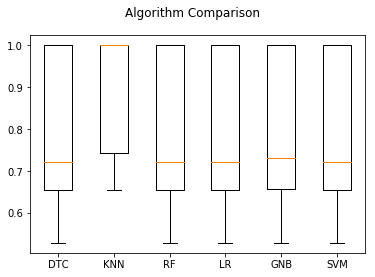

In [6]:
#compare the accuraccy score of models
#import libraries
# load dataset

data = bogo_final.drop(['offer_category'], axis=1)
label = bogo_final['offer_category']
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier ()))
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, data, label, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
y_pred = KNN.predict(X_test)

print(y_pred[:15])
print(y_test[:15])


[ 3.  2.  1.  1.  2.  3.  1.  4.  3.  3.  2.  3.  3.  4.  3.]
36782    3.0
16845    2.0
3344     1.0
2207     1.0
46282    4.0
33819    3.0
13802    1.0
55547    4.0
31719    3.0
40189    3.0
24571    2.0
31495    3.0
31261    3.0
58420    4.0
38128    3.0
Name: offer_category, dtype: float64


In [9]:
X_test.head(15)

,offer_completed,web,social,mobile,email,Under 20,20-45,46-60,Above 60,Male,Female,Under 30000,30000-60000,60000-90000,Above 90000,send_bogo1,send_bogo2,send_bogo3,send_bogo4
36782,0,1.0,0.0,1.0,1.0,0,0,1,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0
16845,1,1.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0.0,1.0,0.0,0.0
3344,0,0.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0
2207,1,0.0,1.0,1.0,1.0,0,0,1,0,0,1,0,1,0,0,1.0,0.0,0.0,0.0
46282,0,1.0,1.0,1.0,1.0,0,0,0,1,0,1,0,1,0,0,0.0,0.0,0.0,0.0
33819,0,1.0,0.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0.0,0.0,1.0,0.0
13802,0,0.0,1.0,1.0,1.0,0,0,0,1,1,0,0,1,0,0,1.0,0.0,0.0,0.0
55547,0,1.0,1.0,1.0,1.0,0,0,0,1,1,0,0,1,0,0,0.0,0.0,0.0,1.0
31719,0,1.0,0.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0.0,0.0,1.0,0.0
40189,0,1.0,0.0,1.0,1.0,0,1,0,0,1,0,0,0,0,1,0.0,0.0,1.0,0.0


In [13]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(4), range(4))
    plt.xticks(range(4), range(4))
    plt.colorbar();
    for i in range(4):
        for j in range(4):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

[[4438    0    0    0]
 [   0 3413    0 1034]
 [   0    0 4027    0]
 [   0  807    0 3878]]


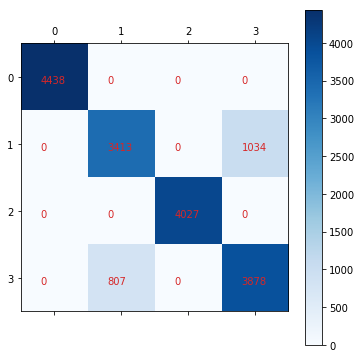

In [14]:
plot_confusion_matrix(y_test, KNN.predict(X_test))

KNN is the recommended model for the bogo offers

############################################################################################################################